In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#!/bin/bash
!kaggle datasets download puxama/bostoncsv

Dataset URL: https://www.kaggle.com/datasets/puxama/bostoncsv
License(s): unknown
  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 43.0MB/s]


In [ ]:
!unzip /content/bostoncsv.zip


Archive:  /content/bostoncsv.zip
  inflating: Boston.csv              


In [ ]:
housing = pd.read_csv('/content/Boston.csv')


In [27]:
housing.head()



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
X = housing.iloc[:,1:14].values   # (506, 13)
Y = housing['medv'].values                # (506,)


In [32]:
print(X.shape)
print(Y.shape)


(506, 13)
(506,)


In [35]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(404, 13)
(102, 13)


In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [38]:
Y_pred = lr.predict(X_test)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(Y_test, Y_pred))
print("R2 Score:", r2_score(Y_test, Y_pred))


MSE: 24.291119474973485
R2 Score: 0.6687594935356325


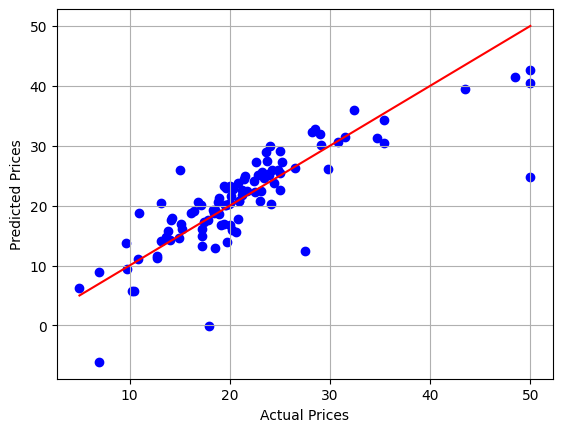

In [44]:
plt.scatter(Y_test, Y_pred, c='b')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         c='r')
plt.grid(True)
plt.show()
